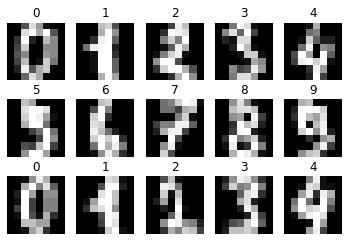

In [4]:
import matplotlib.pyplot as plt

#手書きデータを読み込む
from sklearn import datasets
digits=datasets.load_digits()

#15個連続で出力する
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i],cmap="gray")
    
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import datasets,svm,metrics
from sklearn.metrics import accuracy_score
import pickle

#データを読み込む
digits=datasets.load_digits()
x=digits.images
y=digits.target
y=digits.target
x=x.reshape((-1,64))#二次元配列を一次元配列に変換

#データを学習用とテスト用に分割する
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#データを学習
clf=svm.SVC()
clf.fit(x_train,y_train)

#予測して精度を確認する
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

with open("digits.pkl","wb") as fp:
    clf=pickle.dump(clf,fp)

0.9916666666666667


my3.png=7
my5.png=4
my8.png=4


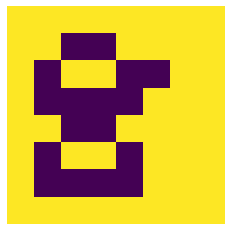

In [14]:
import cv2
import pickle
import matplotlib.pyplot as plt

def predict_digit(filename):
    #学習済みデータを読み込む
    with open("digits.pkl","rb") as fp:
        clf=pickle.load(fp)
    #自分で用意した手書きの画像ファイルを読み込む
    my_img=cv2.imread(filename)
    #画像データを学習済みデータに合わせる
    my_img=cv2.cvtColor(my_img,cv2.COLOR_BGR2GRAY)
    my_img=cv2.resize(my_img,(8,8))
    plt.axis("off")
    plt.imshow(my_img)
    my_img=15-my_img//16 #白黒反転する
    #二次元を一次元に変換
    my_img=my_img.reshape((-1,64))
    #データを予測
    res=clf.predict(my_img)
    return res[0]

#画像ファイルを指定して実行
n=predict_digit("my3.png")
print("my3.png="+str(n))
n=predict_digit("my5.png")
print("my5.png="+str(n))
n=predict_digit("my8.png")
print("my8.png="+str(n))